# **_Predicción de la Demanda en Tiendas Walmart Utilizando un Enfoque Híbrido SARIMA y MLP_**

## **_Introducción_**

El presente trabajo se realiza con el objetivo de aplicar un modelo **_híbrido_** para la predicción de la demanda de la tienda de retail multinacional Walmart. Para esto, se propone un enfoque innovador que combina un modelo de media móvil autorregresiva integrada con estacionalidad (**_SARIMA_**) y un modelo de perceptrón multicapa (**_MLP_**). El objetivo es que, con el primer modelo, se capten las **_tendencias_** y la **_estacionalidad_** de la serie temporal, y con el segundo se aborden las relaciones más complejas que el primer modelo no es capaz de procesar con efectividad.

Adicionalmente, se realiza una comparación de métricas del modelo propuesto versus una serie de **_modelos tradicionales estadísticos_** y de **_aprendizaje profundo_**, con el fin de evaluar la idoneidad del **_modelo híbrido_** que se está proponiendo. Dentro de los modelos de **_benchmark_** se encuentran:

1. Suavización Exponencial Simple (**_SES_**)
2. Suavización Exponencial de Segundo Orden
3. Suavización Exponencial con Factor de Descuento
4. Holt-Winters
5. Media Móvil Autorregresiva (**_ARMA_**)
6. Media Móvil Autorregresiva Integrada (**_ARIMA_**)
7. Perceptrón Multicapa (**_MLP_**)
8. Memoria a Corto y Largo Plazo (**_LSTM_**)

El análisis se llevará a cabo con datos históricos que comprenden desde el mes de febrero de **_2010_** hasta octubre de **_2012_**, correspondientes a las ventas semanales de **_45_** tiendas a lo largo del territorio estadounidense.

Con este trabajo, se espera demostrar que la hibridación de modelos estadísticos clásicos en conjunto con técnicas de aprendizaje profundo puede ofrecer una solución más óptima para la predicción de series temporales en el contexto de la demanda del retail, maximizando la capacidad de **_generalización_** del modelo y mejorando la calidad de las decisiones basadas en los **_pronósticos_**.

El resto del trabajo se encuentra organizado de la siguiente Forma: 
* Información General de la empresa
* Información del Conjunto de datos
* Análisis Exploratorio de Datos
* Fundamentación Matemática de los modelos
* Implementación de los modelos
* Benckmark
* Conclusiones
* Despliegue
* Referencias

## **_Sobre Walmart_**

<image src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Walmart_7.jpg/2880px-Walmart_7.jpg" alt="Tiendas Walmart" caption="Tiendas Walmart">

**_Walmart_** (oficialmente, WalMart, Inc.) es una corporación multinacional de tiendas de origen estadounidense, que opera cadenas de grandes almacenes de descuento y clubes de almacenes. Fue fundada por Sam Walton el 2 de julio de 1962, incorporada el 31 de octubre de 1969, y ha cotizado en la Bolsa de Nueva York desde 1972. Su sede principal está ubicada en Bentonville, Arkansas.

**_Walmart_** es la mayor corporación pública del mundo, según la lista Fortune Global 500 de 2020. Siendo el minorista más grande del mundo que ofrece la mayor oferta de empleo privado en el mundo, con más de 2 millones de empleados. Es una empresa familiar, porque la familia Walton posee el 48% de la compañía.4​ Es también una de las empresas más valiosas en el mundo.5​ Es también la minorista de ultramarinos más grande de EE. UU. En 2009, el 51 % de sus ventas de 258 mil millones de dólares en EE. UU. se generó a partir de sus negocios de ultramarinos.6​ También es el propietario y operador de Sam's Club, una cadena de clubes de almacenes.7​8​

**_Walmart_** tiene casi 11 000 tiendas bajo 65 marcas en 28 países y cuenta con sitios web de comercio electrónico en 11 países.9​ Opera la marca **_Walmart_** en los Estados Unidos, incluyendo los 50 estados y Puerto Rico. En Norte América opera en Canadá, y en México con tiendas WalMart Supercenter y Sam's Club. En el Reino Unido es conocida como Asda; en Japón como Seiyu; en Chile como Líder (**_Walmart_** Chile) y en India como Best Price. Además tiene operaciones en Brasil y cuenta con presencia comercial en Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua y China. [^1]



## ***Sobre el Dataset***

El dataset contiene información de ventas semanales de 45 tiendas alrededor del territorio estadounidense, con diferentes variables que se resumen a continuación:

| ***Nombre de la Variable*** | ***Rol***| ***Tipo*** | ***Descripción*** | ***Unidades*** | ***Valores Faltantes*** |
|:-------------:|:---------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| ***Store***                 | Característica           | int64 | Identificación de la tienda       | adimensional | no        |
| ***Date***          | Index | object | Fecha del registro  | Semanas  | no                |
| ***Weekly_Sales***               | Objetivo     | float64 | Ventas Semanales ($)   | USD   | no                |
| ***Holiday_Flag***               | Característica     | Bool | Indicador si hay festivo en la semana   | adimensional| no                  | 
| ***Temperature***               | Característica     | float64 | Temperatura en la semana  | °F   | no                |
| ***Fuel_Price***               | Característica     | float64 | Precio del Combustible   | USD   | no                |
| ***CPI***               | Característica     | float64 | Indice de Precio al Consumidor  | USD   | no                |
| ***Unemployment***               | Característica     | float64 | Desempleo en la región  | USD   | no                |

El dataset empleado se puede encontrar el la pagina de Kaggle o dando clic [aquí](https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores)

```{admonition} Importante
Para el presente trabajo solo se estara considerando las sumas de las ventas `Weekly_sales` como variable objetivo y la fecha `Date` como indice temporal para la realización del modelo de ***Series de Tiempo***

## ***Análisis Exploratorio de Datos***

En esta sección se presenta un análisis exploratorio de datos sobre el dataset empleado con el objetivo de indentificar el comportamiento de las variables, idenfificar valores faltantes y atípicos, ***tendencia*** y posible ***estacionalidad*** antes de pasar con la construcción de los modelos de ***Series Temporales***.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kurtosis, skew, normaltest, shapiro, kstest
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import itertools
from functions import Functions #Personalized module of functions

### ***Estadísticas Descriptivas***

Primeramente obtenemos las estadísticas basicas del dataset así:

In [2]:
FT = Functions() # Instantiate the class.
df = pd.read_csv("../datasets/walmart-sales-dataset-of-45stores.csv", sep=",")

# Convert to DateTime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Statistics
FT.BasicStatisticsDataFrame(df.iloc[:, 1:])

Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435.0000,6435.0000,6435.0000,6435.0000,6435.0000,6435.0000
mean,2011-06-17 00:00:00,1046964.8776,0.0699,60.6638,3.3586,171.5784,7.9992
min,2010-02-05 00:00:00,209986.2500,0.0000,-2.0600,2.4720,126.0640,3.8790
25%,2010-10-08 00:00:00,553350.1050,0.0000,47.4600,2.9330,131.7350,6.8910
50%,2011-06-17 00:00:00,960746.0400,0.0000,62.6700,3.4450,182.6165,7.8740
75%,2012-02-24 00:00:00,1420158.6600,0.0000,74.9400,3.7350,212.7433,8.6220
max,2012-10-26 00:00:00,3818686.4500,1.0000,100.1400,4.4680,227.2328,14.3130
std,nan,564366.6221,0.2550,18.4449,0.4590,39.3567,1.8759


,Missing Values
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


#### ***Previsualización y Cantidad de registros***
Las primeras 2 partes de la función `BasicStatisticsDataFrame`nos devuelve primeramente una previsualización del dataset, seguido de la cantidad de registros, para este dataset contamos con 6435 registros con 7 columnas (excluyendo las columnas del identificador de la tienda)

#### ***Tipos de Datos***
La tercera sección de la salida de la función nos permite visualizar el tipo de datos de las variables del dataset, donde se evidencia que la variables objetivo `Weekly_Sales` es de tipo `float` y la variables que emplearemos como indice se encuentra en formato `DateTime`.

#### ***Estadísticas descriptivas***

* ***Weekly sales***: La ***media*** de las ventas fue de $1.046.965$ con un valor máximo y mínimo de aproximadamente $3.8$ y $0.2$ millones respectivamente. También se evidencia una ***desviación estandar*** relativamente grande de $564.336$ lo que podría estar indicandonos una ***variación*** considerable entre semanas.

* ***Holiday_Flag***: aproximadamente solo el 7% de las semanas presentarón dias festivos.

* **_Temperature_**: La temperatura ***media*** fue de apoximadamente $60 °F$ con una ***desviación*** relativamente grande de $18.4$ grados, se observa tambíen que aproximadamente el 50% de los datos se encuentran por debajo de este promedio. Se evidencia tambien un ***rango*** amplio de temperaturas que van desde los $-2 °F$ hasta los $100 °F$ grados.

* ***Fuel_Price***: presenta un ****promedio**** de $3.35$ con una ***desviación estandar*** de $0.45$, aproximadamente el 50% de los datos se encuentran por debajo del promedio, presenta un dato ***mínimo*** y ***máximo*** de $2.47$ y $4.46$ respectivamente, evidenciadose ***fluctuaciones*** en estos precios.

* **_CPI_**: Presenta una ***media*** y ***desviación estandar*** de $171.57$ y $39.35$ respectivamente, con un dato ***mínimo*** y ***máximo*** de $126$ y $227$, tanto el **_CPI_** como el **_Unemployment_** presentan comportamiento similares en cuanto a promedios y valores máximos y mínimos.

#### ***Datos Perdidos***
El dataset no presenta valores ***faltantes*** en ninguna de sus variables.

A manera de resumen,  en general las  variables presentan un comportamiento similar en todos los casos, con ***variaciones*** y ***rangos*** relativamente grandes, en ninguno de los casos se presentaron valores ***faltantes*** por ende no hace falta eliminar ningún registro ni realizar ningún proceso de imputación.

```{admonition} Importante
La serie de Tiempo correspondiente a la variable `Weekly_Sales` ***no*** presenta valores faltantes

### ***Análisis Grafico***

Podemos graficar el comportamiento de las variables a lo largo del ***tiempo***, para evidenciar posibles comportamientos, tendencias o ciclos durante periodos de tiempo específicos. Como ya se mencionó antes nos centraremos en analizar la variable `Weekly_Sales` ya que es la que nos interesa para el modelo de series de tiempo, por tanto las demás solo se analizarán aspectos básicos.

#### ***Weekly Sales***


Podemos graficar los promedios de ventas mensuales así:

In [3]:
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month').agg({'Weekly_Sales': 'mean'}).reset_index()

fig = px.bar(monthly_sales, x='Month', y='Weekly_Sales', 
             title='Average Monthly Sales',
             labels={'Month': 'Month', 'Weekly_Sales': 'Average Sales ($)'},
             color_discrete_sequence=['Blue'])

fig.show()

Se observa que el comportamiento es consistente en los meses de enero a septiembre, mientras que de octubre a diciembre se evidencia una tendencia creciente.

También podemos observar el comportamiento por año así:

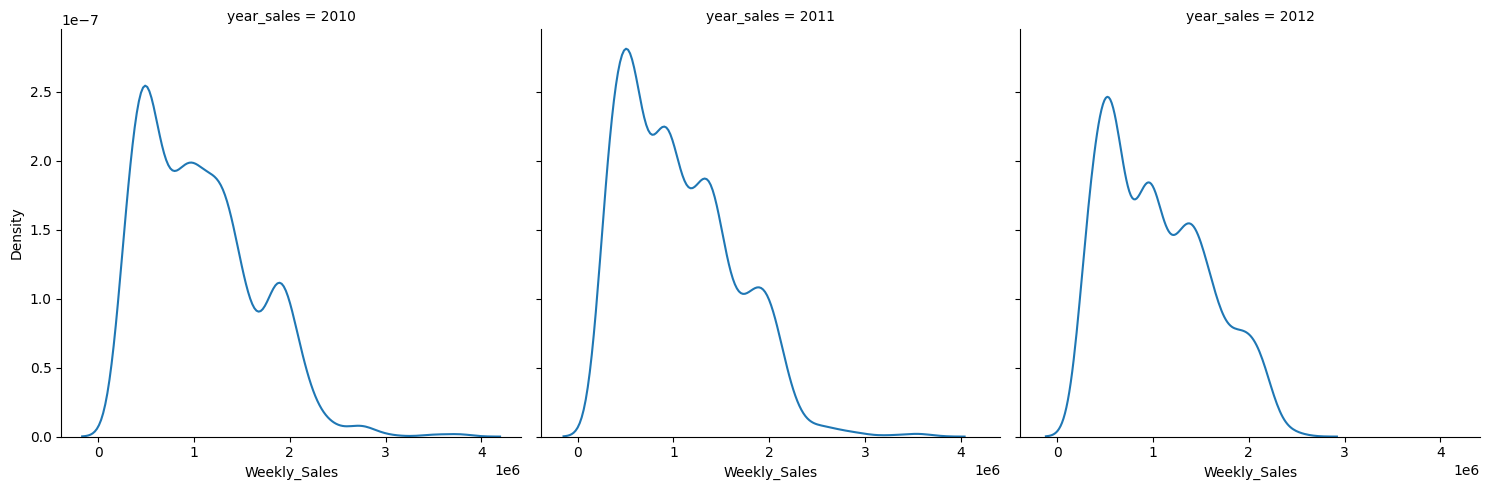

In [4]:
df['year_sales'] = df['Date'].dt.year 
df['year_sales'].value_counts()

sns.displot(data=df, x="Weekly_Sales", col="year_sales", kind="kde")
plt.show()

El comportamiento de las ventas en los diferentes años es similar, en todos los casos las ventas se agrupan en la parte izquierda del gráfico, con un claro sesgo a la derecha. Esto lo podemos visualizar mas detalladamente en el siguiente gráfico.

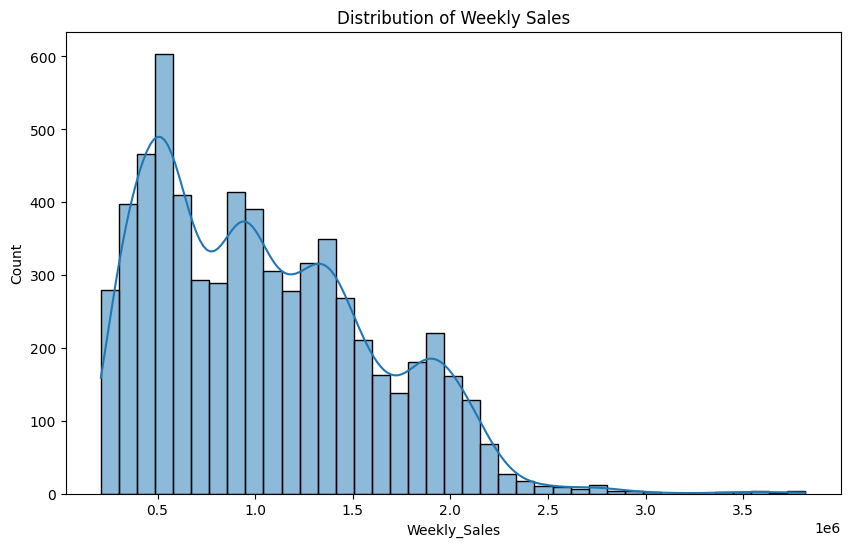

In [5]:
# Plot for 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

La distribución claramente esta sesgada a la derecha, con ventas semanales concentradas en valores bajos, con una moda aproximadamente de $500.000$ y una cola alargada a la derecha, sugiriendonos que los valores altos son atípicos. Igualmente podemos observar que el rango es bastante grande, yendo desde los $200.000$ hasta los $3.5$ aproximadamente. La distribución no parece tener colas pesadas pero ya que se encuentra sesagda podemos intuir que se desvia del comportamiento de una curva normal, esto lo podemos corroborar con un test de normalidad.

#### ***Pruebas de Normalidad***

Podemos realizar la prueba para validar si los datos siguen una distribución normal, esta prueba evalúa la siguiente de hipótesis

$$
Ho: \text{La variable presenta una distribución normal}\\
H1: \text{La variable presenta una distribución No normal}
$$

In [6]:
print('Shapiro-Wilk Test:')
stat, p = shapiro(df["Weekly_Sales"])
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.947068, p=3.811532e-43
Sample does not look Normal (reject H0)


Con un **_valor p_** menor a $\alpha = 0.05$ podemos afirmar que no existe suficiente evidencia estadística para sugerir que los datos siguen una distribución normal.

Estos lo podemos evidenciar graficamente a través de un QQ-plot así:

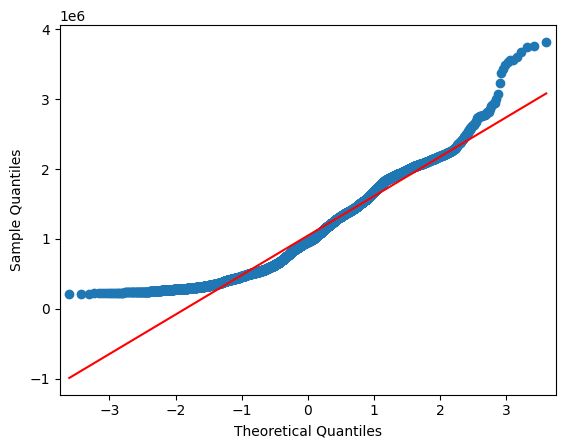

In [7]:
qqplot(df["Weekly_Sales"], line='s');

Podemos evidenciar que los datos no siguen la linea, esto apoya la hipótesis de que el comportamiento no sigue una distribución normal, en este caso se presentan desviaciones en las colas de la distribución, sugiriendonos que pueden haber valores atípicos en la distribución. Por último podemos calcular otra medidas así:

In [8]:
# Extract the 'Weekly_Sales' data for analysis
weekly_sales = df['Weekly_Sales']

# Calculate skewness and kurtosis
sales_skewness = skew(weekly_sales)
sales_kurtosis = kurtosis(weekly_sales)

# Perform normality tests
shapiro_stat, shapiro_p_value = shapiro(weekly_sales)
kstest_stat, kstest_p_value = kstest(weekly_sales, 'norm')
normaltest_stat, normaltest_p_value = normaltest(weekly_sales)

# Compile the results
normality_results = {
    'Skewness': sales_skewness,
    'Kurtosis': sales_kurtosis,
    'Shapiro-Wilk p-value': shapiro_p_value,
    'Kolmogorov-Smirnov p-value': kstest_p_value,
    'D\'Agostino (Normaltest) p-value': normaltest_p_value
}

normality_results

{'Skewness': 0.6682059921068103,
 'Kurtosis': 0.05216738979784408,
 'Shapiro-Wilk p-value': 3.8115318229635024e-43,
 'Kolmogorov-Smirnov p-value': 0.0,
 "D'Agostino (Normaltest) p-value": 9.068819690552112e-88}

Con esto podemos concluir sobre la variable `Weekly_Sales` que: presenta un ligero sesgo positivo con una cola alargada a la derecha, indicanodos que los valores de ventas altos son poco probable, esto puede a su vez ser un indicio de posibles periodos estacionales, tambien evidenciamos que presenta una distribución `Leptocútica` y finalmente con las pruebas de `Shapiro-Wilk`, `Kolmogorov-Smirnov` y `D'Agostino` concluimos que no existe suficiente evidencia estadística para sugerir que los datos siguen una distribución normal.

Finalmente podemos graficar el comportamiento de la variable `Weekly_Sales` en el tiempo para evidenciar visualmente si existen tendencias o comportamientos ciclicos. 

```{admonition} Importante
La serie ***no*** presenta un comportamiento ***normal***, esto se evidenció a través de ***3 pruebas distintas***

#### ***Identificación de Valores Atípicos***

Una de las formas de identificar valores atípicos es a través del ***rango intercuartílico*** el cual identifica valores extremos a través de la siguiente formulación:

***Interquartile Range (IQR) Calculation:***

$$
IQR = Q_3 - Q_1
$$

***Lower Limit for Outlier Detection:***

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR
$$

***Upper Limit for Outlier Detection:***

$$
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

***Conditions for Outlier Detection:***

$$
x < Q_1 - 1.5 \times IQR \quad \text{o} \quad x > Q_3 + 1.5 \times IQR
$$

In [9]:
# Calculate Quantile & IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filters outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

outliers_count = outliers['Weekly_Sales'].count()

percentage_outliers = (outliers_count / len(df)) * 100
percentage_outliers

0.5283605283605284

Podemos observar que hay aproximadamente un ***5%*** de valores atípicos, para este caso no se considera significativo este porcentaje ya que podríamos estar ante la presencia de valores extremos que se presentan en posibles periodos ***estacionales***, podemos visualizar las fechas de las semanas donde se presentan estos valores imprimiendo la variable `outliers` así:

In [10]:
outliers['Weekly_Sales']

189     3436007.68
241     3224369.80
471     2789469.45
474     2740057.14
475     3526713.39
523     3004702.33
526     2771397.17
527     3676388.98
761     2727575.18
1329    2939946.38
1332    2811646.85
1333    3749057.69
1381    2950198.64
1385    3487986.89
1758    2766400.05
1761    2771646.81
1762    3595903.20
1810    2864170.61
1813    2760346.71
1814    3556766.03
1901    2921709.71
1904    2762861.41
1905    3818686.45
1957    3369068.99
2759    2811634.04
2761    2752122.08
2762    2819193.17
2763    3766687.43
2811    2906233.25
2814    2762816.65
2815    3555371.03
3192    2734277.10
3764    3078162.08
3816    2739019.75
Name: Weekly_Sales, dtype: float64

Se evidencia que todos los valores ***extremos*** identificados a través del ***IQR*** pertenecen a los meses de ***Noviembre*** y ***Diciembre***, esto podría ser evidencia de la presencia de un periodo estacional durante estos meses influenciado por las festividades de fin de año que influyen en el crecimiento de la demanda. Para corroborar esto, en la siguiente subsección se aborda el análisis del comportamiento de la variable `Weekly_Sales` en el tiempo y su descomposición.

```{admonition} Importante
No se considerarón valores atípicos los hallados por el ***IQR*** ya que se evidencia pertenecen al comportamiento real de la variable `Weekly_Sales` 

#### ***Weekly_Sales como serie temporal***

In [11]:
df.set_index('Date', inplace=True)
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Plot Weekly Sales
fig = px.line(weekly_sales, title='Total Weekly Sales Across All Stores')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Weekly Sales ($)'
)

fig.show()

El gráfico anterior muestra el comportamiento de las ventas semanales de 45 tiendas de ***Walmart*** entre los años 2010 y 2012, revelando ***fluctuaciones*** significativas en periodos específicos. Más concretamente, se observa que estos picos ***estacionales*** comienzan a mediados de ***noviembre*** y caen abruptamente a finales de ***diciembre***, repitiéndose este ***patrón*** año tras año. Esto sugiere la existencia de un componente ***estacional*** en la serie, posiblemente asociado con festividades como ***Thanksgiving*** o ***Navidad***, lo cual corroboraremos en la siguiente subsección.

A simple vista, no se observa una ***tendencia*** clara que evidencie un aumento o disminución sostenida en las ventas semanales. Sin embargo, esta ***tendencia*** podría identificarse al ***descomponer*** la serie en sus componentes para analizarlos de forma individual, como se mostrará en la siguiente subsección.

En cuanto al resto del año, se aprecia un comportamiento más o menos consistente, sin cambios abruptos en el nivel de las ventas.

#### ***Descomposicion de la serie***

In [12]:
# Decompose the time series
decomposition = seasonal_decompose(weekly_sales, model='additive')

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residual'))

# Observed
fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed, mode='lines', name='Observed'), row=1, col=1)

# Trend
fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)

# Seasonal
fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)

# Residual
fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(height=800, title_text='Time Series Walmart Decomposition')
fig.show()

Al descomponer la serie obtenemos los 4 componentes que se analizan a continuación:

* **_Observed_**: Este gráfico representa los datos en bruto tal y como fueron tomados y registrados, lo que mas resalta en este grafico son los picos que se presentan a finales de cada año, sugiriedonos la existencia de una posible estacionalidad. El resto del año las ventas presentan un comportamiento consistente.

* **_Trend_**: Este gráfico representa la tendencia real de la serie, una vez excluido las fluctuaciones estacionales y el ruido. Se evidencia una fluctuación entre los 47 y 48 millones con un descenso en las ventas en el periodo de finales del 2010 y comienzos de 2011, seguido de un aumento constante hasta mediados de 2012. 
El gráfico marca una tendencia creciente independiente de los posibles efectos de estacionalidades o ciclos.

* **_Seasonal_**: Este gráfico representa el componente estacional presente en la serie, se evidencia un patrón consistente entre los años 2011 y 2012 (mas concretamente a finales de los mismos), sugiriendo la existencia de una estacionalidad que como ya se mencionó antes muy seguramente se deba a un aumento en las ventas por temas de festividades como el día de acción de gracias y la navidad.

* **_Residual_**: Este gráfico representa lo queda luego de excluir la tendencia y la estacionalidad de los datos originales, esto es: fluctuaciones aleatorias o irregulares que no logran ser explicadas por los componentes antes mencionados. Para este caso no se observa ninguna tendencia marcada en el gráfico, sugiriendo que la descomposición ha capturado correctamente los componentes de la serie temporal.

Finalmente podemos validar estadísticamente si la serie es ***estacionaria*** a tráves de la prueba [***Augmented Dickey-Fuller***](https://es.statisticseasily.com/glosario/¿Qué-es-la-prueba-completa-de-Dickey-aumentada%3F/) que evalúa la siguiente hipótesis:

$$
Ho: \text{La serie tiene una raíz unitaria (no es estacionaria)}\\
H1: \text{La serie no tiene raíz unitaria (es estacionaria)}
$$

En resumen una serie es ***estacionaria*** cuando sus propiedades ***estadísticas*** como la ***media*** y la ***varianza*** se mantienen constaste en el tiempo.

In [13]:
result = adfuller(weekly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.90829795718633
p-value: 2.6759791589860825e-07


Con un valor del estadístico de -5.908 y un valor p menor a $\alpha = 0.05$ se concluye que la serie es ***estacionaria***, esto implica que las propiedades estadísticas de la serie como la ***media*** y ***varianza*** se mantienen constante en el tiempo, esto nos servirá de guía para la busqueda y aplicación del mejor modelo de serie de tiempo que se adapte a este comportamiento.

También destacar el hecho de que no hace falta aplicar ningún tipo de ***diferenciación*** ya que la serie ya se encuentra ***estacionada***.

#### ***Análisis con Media Movil***

Podemos intentar captar la tendencia de la serie a través de una suavización con una ventana movil, par este caso probaremos a graficar con una ventana de 4 semanas y una de 12 así:

In [14]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Apply Smoothing with Moving Average (# Window of 4 Weeks and 12 Weeks).
weekly_sales_4 = weekly_sales.rolling(window=4).mean()
weekly_sales_12 = weekly_sales.rolling(window=12).mean()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Moving Averages (4 Weeks)", "Moving Averages (12 Weeks)"))

# Add 4-Weeks Moving Average Graph to First Column.
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales,
                         mode='lines', name='Original Sales', line=dict(color='blue')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales_4,
                         mode='lines', name='Moving Averages (4 Weeks)', line=dict(color='red')),
              row=1, col=1)

# Add 12-Weeks Moving Average Graph to Second Column.
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales,
                         mode='lines', name='Original Sales', line=dict(color='blue')),
              row=1, col=2)

fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales_12,
                         mode='lines', name='Moving Averages (12 Weeks)', line=dict(color='green')),
              row=1, col=2)

fig.update_layout(title_text="Comparison of Moving Averages (4 Weeks vs 12 Weeks)", 
                  showlegend=False, height=600, width=1200)

# Mostrar la figura
fig.show()

Con una ventana de ***4 semanas***, la media móvil es más sensible a los cambios repentinos en la serie. Podemos observar que los picos ***estacionales*** se conservan, aunque un poco más atenuados. Además, se comienza a evidenciar la ***tendencia alcista*** que ya habíamos identificado en la descomposición anterior.

Con una ventana de ***12 semanas***, el comportamiento de la serie se ve mucho más ***suavizado***. El ***ruido*** presente en los datos disminuye, aunque los picos ***estacionales*** siguen presentes, pero de manera menos pronunciada. La ***tendencia*** general se vuelve más clara y estable.

Finalmente, podemos concluir, tanto ***estadística*** como ***gráficamente***, que la serie presenta una clara ***estacionalidad***, así como una ***tendencia creciente a lo largo del tiempo***.

#### ***Análisis de Autocorrelación y Autocorrelación Parcial***

La autocorrelación (***ACF***) es una herramienta fundamental para el análisis de series de tiempo, ya que nos permite identificar el grado de ***dependencia lineal*** de un valor futuro con respecto a los valores previos, también llamados **rezagos**.

Una autocorrelación positiva indica que los valores presentes y futuros se mueven en la misma dirección, mientras que una autocorrelación negativa sugiere que los valores presentes y futuros se mueven en direcciones opuestas. Esto es útil para detectar tendencias por ejemplo. Si los valores de ***ACF*** son cercanos a cero, estaríamos ante una ***dependencia lineal débil***. 

La ***ACF*** mide el grado de dependencia entre un valor ***$Y_t$*** y ***$Y_{t+k}$*** pero teniendo en cuenta los valores intermedios entre estos dos puntos, lo que podría influir en la medición y no ofrecer una correlación real. Para resolver esto, surge la ***Autocorrelación Parcial (PACF)***, que mide la relación omitiendo los valores intermedios, permitiendo captar el grado de dependencia real entre los puntos en el tiempo.

Por último, una vez obtenidas estas ***autocorrelaciones***, es necesario validar si son estadísticamente significativas, para lo cual empleamos la prueba de ***Ljung-Box***. [^2]

A continuación, se calculan ambas métricas para la variable `Weekly_Sales`.

<Figure size 1200x600 with 0 Axes>

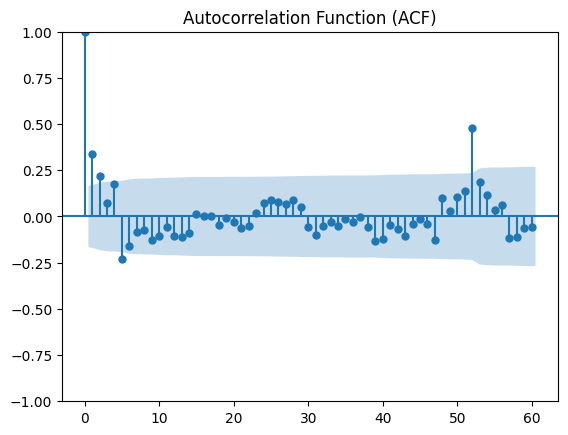

In [15]:
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales, lags=60)
plt.title('Autocorrelation Function (ACF)')
plt.show()

Podemos observar que existen tres ***rezagos*** significativos en la gráfica, lo que indica que los valores de las ventas semanales están correlacionados con sus propios ***rezagos***. Más concretamente, podemos evidenciar que los ***rezagos 1 y 2*** son ***positivos*** y ***estadísticamente significativos***. Por tanto, podemos afirmar que las ventas de una semana están fuertemente ***correlacionadas*** con las ventas de la semana anterior, lo cual sugiere una ***dependencia lineal*** directa a corto plazo en las ventas semanales.

Además, se observa que, luego de los primeros ***rezagos***, los restantes siguen un comportamiento ***senoidal***, lo que podría estar representando el comportamiento ***estacional*** presente en la serie. Este patrón oscilante sugiere que las ventas siguen un ciclo repetitivo, lo que puede ser común en ventas relacionadas con temporadas o eventos específicos.

Por último, también se observa que el quinto ***rezago*** es ***significativo***, pero a diferencia de los anteriores, este es ***negativo***. Esto se puede interpretar como que las ventas de hace 5 semanas están i***nversamente correlacionadas*** con las ventas actuales. Es decir, si las ventas fueron altas hace 5 semanas, es probable que las ventas actuales sean más bajas, esto podría sugerir algún tipo de ***patrón cíclico*** o de ***corrección*** en la demanda.

<Figure size 1200x600 with 0 Axes>

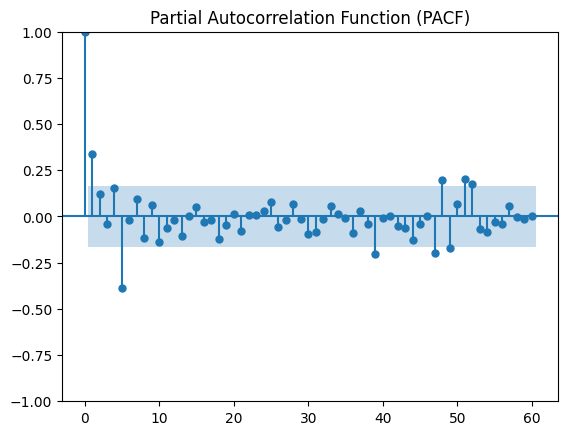

In [16]:
plt.figure(figsize=(12, 6))
plot_pacf(weekly_sales, lags=60)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

De la gráfica ***PACF*** podemos observar que existen dos ***rezagos*** ***significativos***, lo que, al igual que en el gráfico de ***ACF***, indica que existe una ***dependencia lineal*** entre las ventas de la semana actual y las ventas de semanas anteriores. También, al igual que en el ***ACF***, se evidencia un quinto rezago ***estadísticamente significativo***, además de un comportamiento ***senoidal*** después de los primeros rezagos. Este comportamiento apoya lo evidenciado en el análisis gráfico anterior donde se evidenciaba un pequeño patrón cíclico y uno estacional evidente en la serie.

La conclusión para el ***PACF*** es similar a la obtenida para el ***ACF***. El hecho de que el primer rezago sea significativo nos da una idea sobre el ***orden autoregresivo*** que deberíamos elegir inicialmente para el modelado de un ***ARIMA***.

Finalmente realizamos la prueba ***Ljung-Box*** para validar la ***significancia*** de estas ***autocorrelaciones***.

In [17]:
acf_ws, confint_ws, qstat_ws, pvalues_ws = stattools.acf(df['Weekly_Sales'],
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

alpha = 0.05
for l, p_val in enumerate(pvalues_ws):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

La prueba de ***Ljung-Box*** para los primeros ***20*** rezagos indica que todos los ***rezagos*** son ***significativos***, lo que significa que la serie no es ***aleatoria***. Por lo tanto, podemos afirmar que la serie presenta ***patrones temporales*** que deben ser modelados para capturar su ***comportamiento real***. Teniendo en cuenta esto, se sugiere utilizar un modelo capaz de capturar estos patrones, como un ***ARIMA*** o ***SARIMA***, ya que la serie no puede ser tratada como ***ruido blanco*** ni como ***independiente***.

```{admonition} Importante
Mediante el análisis de ***Autocorrelación*** y ***Autocorrelación Parcial*** podemos obtener un valor inicial del ***orden autoregresivo*** para un modelo ***ARIMA***, en este caso ***AR(1)***

#### ***Otras Variables***

##### ***Holiday Flags***

Podemos observar que la distribución de los días festivos es bastante limitada, ya que estos son en su mayoría minoritarios

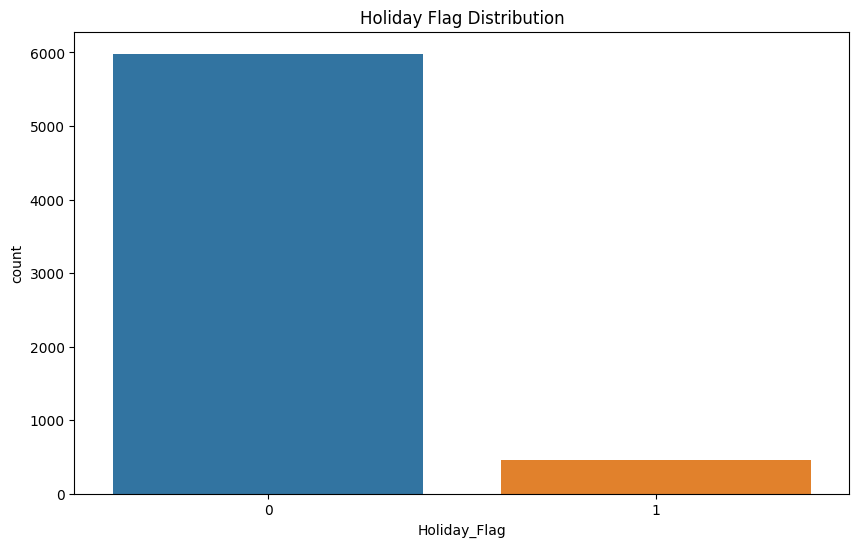

In [18]:
# Plot for 'Holiday_Flag'
plt.figure(figsize=(10, 6))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Holiday Flag Distribution')
plt.show()

Podemos graficar la variación entre las ventas cuando hay festivos y cuando no los hay así:

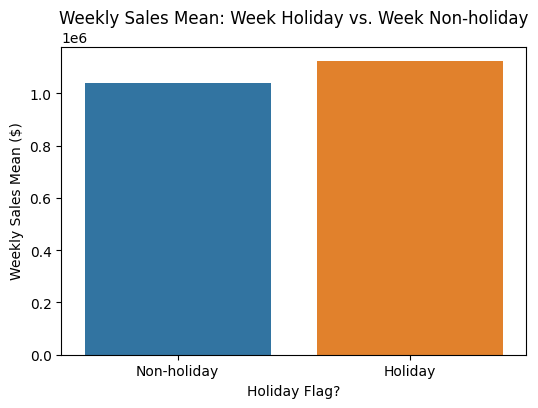

In [19]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Weekly Sales Mean: Week Holiday vs. Week Non-holiday')
plt.xlabel('Holiday Flag?')
plt.ylabel('Weekly Sales Mean ($)')
plt.xticks([0, 1], ['Non-holiday', 'Holiday'], rotation=0)
plt.show()

holiday_diff = ((holiday_sales[1] - holiday_sales[0]) / holiday_sales[0]) * 100

Se evidencia que las ventas durante semanas festivas son un 7.84% más altas en promedio.

#### ***Temperature***

In [20]:
# Plot Temperature
fig = px.histogram(df, x='Temperature', title='Distribution of Temperature')
fig.show()

Observamos gráficamente el mismo comportamiento descrito al inicio del documento, adicionalmente podemos evidenciar una ligera ***asimetría*** hacia la derecha, con una ***cola*** izquerda mas alargada.

Podemos graficar la relación entre esta variable y las ventas semanales así:

In [21]:
fig = px.scatter(df, x='Temperature', y='Weekly_Sales', 
                 title='Relationship between Temperature and Weekly Sales',
                 labels={'Temperature': 'Temperature (°F)', 'Weekly_Sales': 'Weekly Sales ($)'},
                 opacity=0.5)

fig.show()

No se observa una ***relación lineal*** a simple vista entre estas dos variables.

##### ***Fuel Price***

In [22]:
fig= px.histogram(df, x='Fuel_Price', title='Distribution of Fuel Price')
fig.show()


Para el caso de **_Fuel Price_** evidenciamos una distribución ***bimodal***, con un muy pequeño ***sesgo*** hacia la derecha.

In [23]:
fig = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', 
                 title='Relationship between fuel prices and sales',
                 labels={'Fuel_Price': 'Fuel_Price', 'Weekly_Sales': 'Weekly Sales ($)'},
                 opacity=0.5)

fig.show()

Nuevamente no se logra apreciar una relación clara entre esta variable y las ventas semanales.

##### ***CPI***

In [24]:
fig = px.histogram(df, x='CPI', title='Distribution of CPI')
fig.show()

Al igual que anterior, observamos una distribución bimodal para el **_CPI_** con una mayor ***frecuencia*** en los valores mas bajos y una cola mas alargada y pequeña en los valores altos.

Se evidencia tambien un descenso en los valores entre 160 y 180

In [25]:
fig = px.scatter(df, x='CPI', y='Weekly_Sales', 
                 title='Relationship between CPI and sales',
                 labels={'CPI': 'CPI', 'Weekly_Sales': 'Weekly Sales ($)'},
                 opacity=0.5)

fig.show()

Al igual que las demas variables no se evidencia ***correlación lineal*** con la variable ventas semanales.

##### ***Unemployment***

In [26]:
fig = px.histogram(df, x='Unemployment', title='Distribution of Unemployment')
fig.show()

Para el caso de **_Unemployment_** se evidencia una distribución hasta cierto punto mas parecida a una **_Gaussiana_** con un claro ***sesgo*** a la derecha con la mayoria de las tasas de desempleo en valores bajos y una ***cola alargada*** hacia las tasas mas altas.

In [27]:
fig = px.scatter(df, x='Unemployment', y='Weekly_Sales', 
                 title='Relationship between Unemployment and sales',
                 labels={'Unemployment': 'Unemployment', 'Weekly_Sales': 'Weekly Sales ($)'},
                 opacity=0.5)

fig.show()

Aunque no se evidencia una relación clara, de entre todas, esta variable es la que mayor ***correlación*** parece tener con las ventas semanales.

#### ***Correlación Lineal***

Podemos graficar las ***correlaciones*** lineales entre las variables para validar la existencia de posibles colinealidades o multicolinealidades.

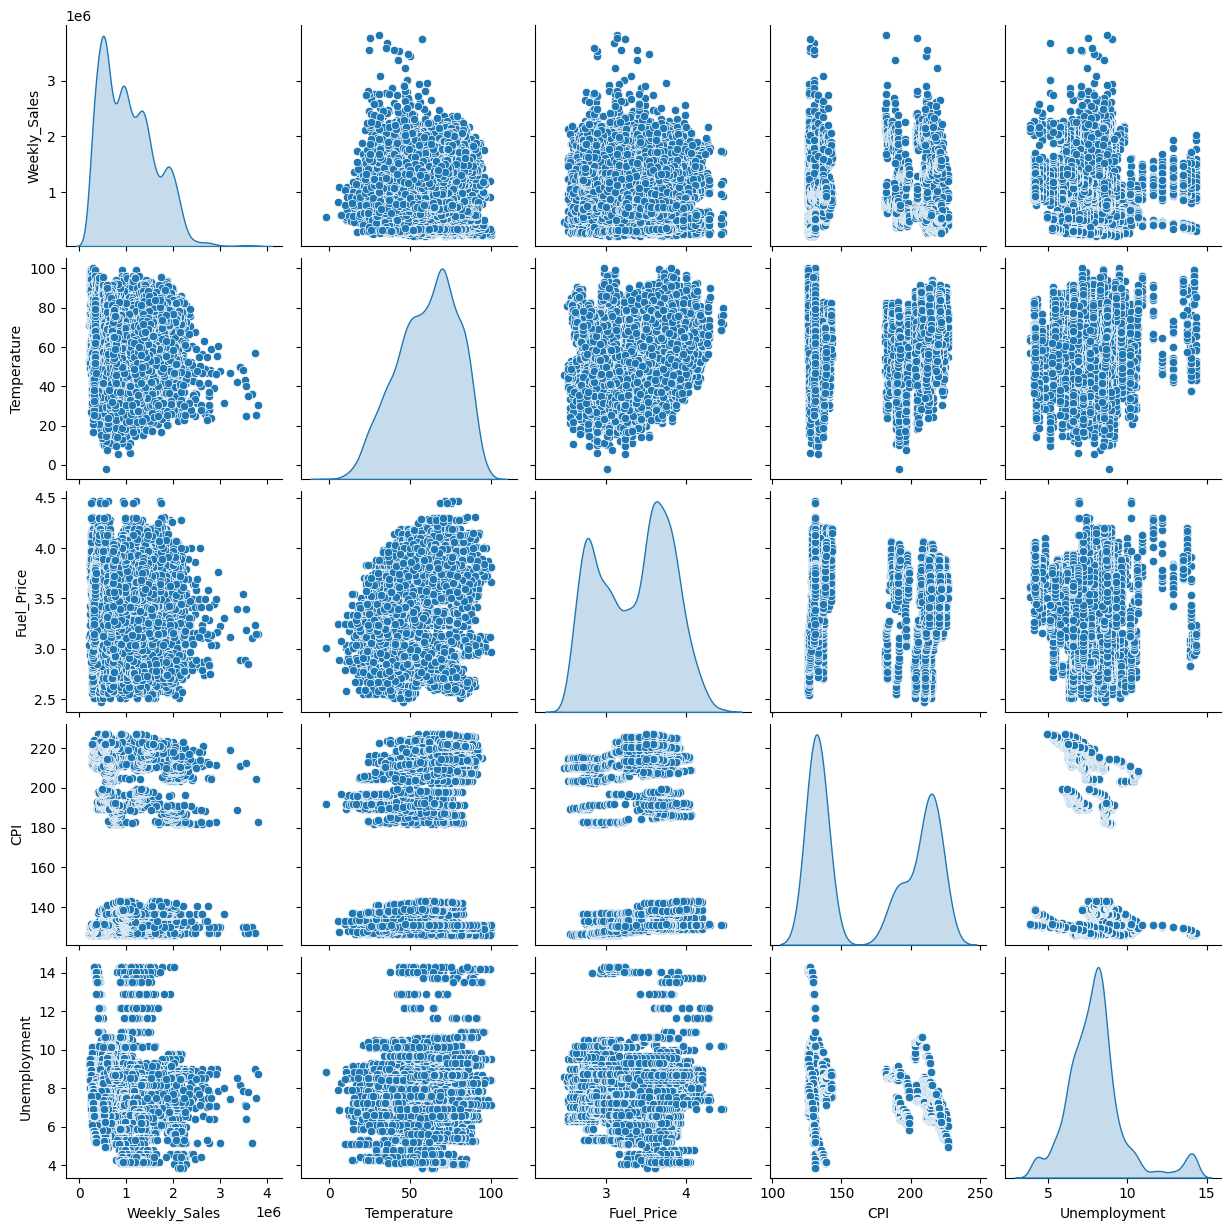

In [28]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], diag_kind='kde')
plt.show()

No se evidencia correlación lineal clara entre ningún par de variables. Las relaciones entre las ventas semanales y las demas variables son bajas, siendo la de mayor magnitud la correlación con `Unemployment` sugiriendo que a menor tasa de desempleo, las ventas tienden a subir.

Esto mismo lo podemos observar a traves de un **_Heat Map_** donde podemos visualizar la magnitud de estas correlaciones, las cuales todas son menor o igual a 0.3.

In [29]:
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

fig = px.imshow(corr_matrix, text_auto=True, title='Correlation matrix')
fig.show()

Observamos, como se mencionó anteriormente, que la correlación más alta con la variable `Weekly_Sales` es con `Unemployment`. Aunque sería posible profundizar en las demás correlaciones, para los efectos del modelado de series de tiempo, esto carece de importancia en este momento por ende no se realizará.

## ***Fundamentación Matemática***


### ***Suavización Exponencial Simple (SES)***

### ***Suavización Exponencial Doble***

### ***Suavización Exponencial con Factor de Descuento***

### ***Holt Winters***

### ***Media Móvil Autorregresiva (ARMA)***


### ***Media Móvil Autorregresiva Integrada (ARIMA)***


### ***Perceptrón Multicapa (MLP)***


### ***Memoria a Corto y Largo Plazo (LSTM)***

### ***Metricas***

## ***Implementación***


### ***Suavización Exponencial Simple***

In [30]:
df = pd.read_csv("../datasets/walmart-sales-dataset-of-45stores.csv", sep=",")

# Convert to DateTime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date')
df = df[['Date', 'Weekly_Sales']]
df = df.groupby('Date', as_index=False)['Weekly_Sales'].sum()

# Partitioning
train_size = int(len(df) * 0.8)
val_size = int(len(df) * 0.10)
test_size = len(df) - train_size - val_size

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

train_data.index = train_data['Date']
train_data.drop('Date', axis=1, inplace=True)

val_data.index = val_data['Date']
val_data.drop('Date', axis=1, inplace=True)

test_data.index = test_data['Date']
test_data.drop('Date', axis=1, inplace=True)


(114, 2)
(14, 2)
(15, 2)


In [31]:
def firstsmooth(y, lambda_, start=None):
    ytilde = y.copy() 
    if start is None:
        start = y.iloc[0]
    ytilde.iloc[0] = lambda_ * y.iloc[0] + (1 - lambda_) * start
    for i in range(1, len(y)):
        ytilde.iloc[i] = lambda_ * y.iloc[i] + (1 - lambda_) * ytilde.iloc[i - 1]
    return ytilde


In [32]:
lambda_values = [0.1, 0.2, 0.3, 0.4, 0.5]

metrics_results = []

def calculate_metrics(y_true, y_pred):
    # Calcular RMSE y MAE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

for lambda_ in lambda_values:
    ses_smoothed = firstsmooth(train_data['Weekly_Sales'], lambda_)
    
    rmse, mae = calculate_metrics(train_data['Weekly_Sales'], ses_smoothed)
    
    metrics_results.append({
        "lambda": lambda_,
        "RMSE": rmse,
        "MAE": mae
    })

metrics_df = pd.DataFrame(metrics_results)

best_model_rmse = metrics_df.loc[metrics_df['RMSE'].idxmin()]

print("Mejor modelo basado en RMSE:")
print(best_model_rmse)

Mejor modelo basado en RMSE:
lambda    5.000000e-01
RMSE      3.031735e+06
MAE       1.706371e+06
Name: 4, dtype: float64


In [33]:
lambda_ = best_model_rmse['lambda']
train_data['SES'] = firstsmooth(train_data['Weekly_Sales'], lambda_)

In [34]:
#Reset 'Date' as a Column
train_data_reset = train_data.reset_index()

fig = go.Figure()

# Add Weekly Sales Line with 'Date' Column.
fig.add_trace(go.Scatter(x=train_data_reset['Date'], y=train_data_reset['Weekly_Sales'],
                         mode='lines', name='Weekly Sales - Training Data'))

# Add SES Line
fig.add_trace(go.Scatter(x=train_data_reset['Date'], y=train_data_reset['SES'],
                         mode='lines', name='SES', line=dict(color='red')))

fig.update_layout(
    title='Exponential Smoothing with Single-Step (SES) of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    legend=dict(x=0, y=1),
    showlegend=True,
    hovermode='x unified'
)

fig.show()


In [35]:
def measacc_fs(y, lambda_, model_name):
    out = firstsmooth(y, lambda_)
    
    T = len(y)
    k = 1  # lambda
    
    yh = y.copy().values
    out_shifted = pd.concat([pd.Series([y[0]]), out.iloc[:-1]], ignore_index=True).values
    
    # Prediction Errors
    prederr = yh - out_shifted
    
    # Calcular SSE, MAPE, MAD, MSD
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    
    # R², MAE, RMSE
    r2 = r2_score(yh, out_shifted)
    MAE = mean_absolute_error(yh, out_shifted)
    RMSE = np.sqrt(mean_squared_error(yh, out_shifted))
    
    # Calcular AIC, BIC, HQIC
    AIC = np.log(SSE / T) + (2 * p) / T # np.log(SSE / T) + 2 * k 
    BIC = np.log(SSE / T) + (p * np.log(T)) / T #T * np.log(SSE / T) + k * np.log(T)
    HQIC = T * np.log(SSE / T) + 2 * k * np.log(np.log(T))

    # Jarque-Bera p-value for Residuals
    jb_test = jarque_bera(prederr)
    jb_pvalue = jb_test[1]
    
    # Ljung-box Test
    _, _, _, pvaluesjb = stattools.acf(prederr, nlags=20, qstat=True, alpha=0.05)
    ljung_box_pvalue = pvaluesjb[0]  # p-value for First Lag

    # Create Metrics DataFrame
    ret1 = pd.DataFrame({
        "Model_Name":[model_name],
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD],
        "R²": [r2],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "AIC": [AIC],
        "BIC": [BIC],
        "HQIC": [HQIC],
        "p-value Jarque-Bera": [jb_pvalue],
        "p-value Ljung-Box": [ljung_box_pvalue]
    })
    
    # Reset index
    ret1.reset_index(drop=True, inplace=True)
    
    return ret1

In [36]:
metrics_list_train = []
metrics_list_train.append(measacc_fs(train_data['Weekly_Sales'], lambda_, "SES").round(4))

In [37]:
# Smoothening in Validation Set
val_data['SES'] = firstsmooth(val_data['Weekly_Sales'], lambda_)

# Smoothening in Test Set
test_data['SES'] = firstsmooth(test_data['Weekly_Sales'], lambda_)

In [38]:
# #Reset 'Date' as a Column
train_data_reset = train_data.reset_index()
val_data_reset = val_data.reset_index()
test_data_reset = test_data.reset_index()

fig = go.Figure()

# Add Original Weekly Sales Line
fig.add_trace(go.Scatter(x=df['Date'], y=df['Weekly_Sales'],
                         mode='lines', name='Weekly Sales - Original Data', line=dict(color='blue')))

# Add SES Training Line
fig.add_trace(go.Scatter(x=train_data_reset['Date'], y=train_data_reset['SES'],
                         mode='lines', name='SES - Training', line=dict(color='red')))

# Add SES Validation Line
fig.add_trace(go.Scatter(x=val_data_reset['Date'], y=val_data_reset['SES'],
                         mode='lines', name='SES - Validation', line=dict(color='green')))

# Add SES Test Line
fig.add_trace(go.Scatter(x=test_data_reset['Date'], y=test_data_reset['SES'],
                         mode='lines', name='SES - Test', line=dict(color='orange')))

fig.update_layout(
    title='Exponential Smoothing (SES) - Original, Training, Validation, and Test',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    legend=dict(x=0, y=1),
    showlegend=True,
    hovermode='x unified'
)

fig.show()


In [39]:
metrics_list_val=[]
metrics_list_val.append(measacc_fs(val_data['Weekly_Sales'], lambda_, 'SES').round(4))
metrics_list_val

[  Model_Name           SSE    MAPE           MAD           MSD      R²  \
 0        SES  4.835595e+13  3.2162  1.525637e+06  3.453997e+12 -0.0885   
 
             MAE         RMSE      AIC      BIC      HQIC  p-value Jarque-Bera  \
 0  1.525637e+06  1858493.139  28.8706  28.8706  406.1286                0.901   
 
    p-value Ljung-Box  
 0             0.2424  ]

In [40]:
metrics_list_test=[]
metrics_list_test.append(measacc_fs(test_data['Weekly_Sales'], lambda_, 'SES').round(4))
metrics_list_test

[  Model_Name           SSE    MAPE           MAD           MSD      R²  \
 0        SES  4.050002e+13  2.6854  1.229367e+06  2.700002e+12 -0.2397   
 
             MAE          RMSE      AIC      BIC      HQIC  \
 0  1.229367e+06  1.643168e+06  28.6243  28.6243  431.3566   
 
    p-value Jarque-Bera  p-value Ljung-Box  
 0               0.9866             0.8801  ]

### ***Suavización Exponencial Doble***

In [41]:
train_data_s1 = firstsmooth(y=train_data['Weekly_Sales'], lambda_=0.3)
train_data_s2 = firstsmooth(y=train_data_s1, lambda_=0.3)
weekly_sales_hat = 2 * train_data_s1 - train_data_s2

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=train_data['Weekly_Sales'], 
    mode='markers', 
    marker=dict(size=6), 
    name='Weekly Sales'
))

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=weekly_sales_hat, 
    mode='lines', 
    name='DES lambda=0.3'
))

fig.update_layout(
    title=f'Double Exponential Smoothing lambda=0.3',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    showlegend=True
)

fig.show()

In [42]:
metrics_list_train.append(measacc_fs(train_data_s1, 0.3, "DES").round(4))

### ***Suavización Exponencial con Factor de Descuento***

In [43]:
def tlsmooth(y, delta_, y_tilde_start=None, lambda_start=1):
    T = len(y)
    
    Qt = np.zeros(T)
    Dt = np.zeros(T)
    y_tilde = np.zeros(T)
    lambd = np.zeros(T)
    err = np.zeros(T)
    
    lambd[0] = lambda_start
    if y_tilde_start is None:
        y_tilde[0] = y.iloc[0]  # Use `.iloc` for Positional Access.
    else:
        y_tilde[0] = y_tilde_start  
    
    for i in range(1, T):
        err[i] = y.iloc[i] - y_tilde[i-1]  
        Qt[i] = delta_ * err[i] + (1 - delta_) * Qt[i-1]
        Dt[i] = delta_ * abs(err[i]) + (1 - delta_) * Dt[i-1]
        lambd[i] = abs(Qt[i] / Dt[i])
        y_tilde[i] = lambd[i] * y.iloc[i] + (1 - lambd[i]) * y_tilde[i-1]  
    
    return np.column_stack((y_tilde, lambd, err, Qt, Dt))



In [44]:
out_tl_ws = tlsmooth(train_data['Weekly_Sales'], delta_=0.3)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=train_data['Weekly_Sales'], 
    mode='markers', 
    marker=dict(color='black', size=6), 
    name='Weekly Sales'
))

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=out_tl_ws[:, 0],  
    mode='lines', 
    line=dict(color='blue'), 
    name='TL Smoother'
))

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=train_data_s1, 
    mode='lines', 
    line=dict(color='red'), 
    name='SES'
))

fig.update_layout(
    title='Weekly Sales with Exponential and TL Smoother',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    legend_title='Series',
    showlegend=True
)

fig.show()


In [45]:
def measacc_tlsmooth(y, delta_, model_name):
    # Aplicar la función tlsmooth
    out = tlsmooth(y, delta_)
    
    T = len(y)
    k = 1
    
    y_tilde = out[:, 0]
    
    prederr = y.values - y_tilde  
    
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / y.values)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    
    r2 = r2_score(y.values, y_tilde)
    MAE = mean_absolute_error(y.values, y_tilde)
    RMSE = np.sqrt(mean_squared_error(y.values, y_tilde))
    
    AIC = np.log(SSE / T) + (2 * k) / T
    BIC = np.log(SSE / T) + (k * np.log(T)) / T
    HQIC = T * np.log(SSE / T) + 2 * k * np.log(np.log(T))

    jb_test = jarque_bera(prederr)
    jb_pvalue = jb_test[1]
    
    _, _, _, pvaluesjb = stattools.acf(prederr, nlags=20, qstat=True, alpha=0.05)
    ljung_box_pvalue = pvaluesjb[0] 

    ret1 = pd.DataFrame({
        "Model_Name": [model_name],
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD],
        "R²": [r2],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "AIC": [AIC],
        "BIC": [BIC],
        "HQIC": [HQIC],
        "p-value Jarque-Bera": [jb_pvalue],
        "p-value Ljung-Box": [ljung_box_pvalue]
    })
    
    ret1.reset_index(drop=True, inplace=True)
    
    return ret1


In [46]:
metrics_list_train.append(measacc_tlsmooth(train_data['Weekly_Sales'], delta_=0.3, model_name="TLSmooth"))

### ***Holt Winters***

In [47]:
warnings.filterwarnings("ignore")
model = ExponentialSmoothing(train_data['Weekly_Sales'],
                             trend='add', 
                             seasonal='add',
                             seasonal_periods=52)

hw_model_fit = model.fit()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=train_data['Weekly_Sales'], 
    mode='lines', 
    name='Weekly Sales'
))

fig.add_trace(go.Scatter(
    x=train_data.index, 
    y=hw_model_fit.fittedvalues, 
    mode='lines', 
    name='Holt-Winters', 
    line=dict(color='orange')
))

fig.update_layout(
    title='Holt-Winters: Original Data vs Model Fit',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    legend=dict(x=0, y=1),
    showlegend=True,
    hovermode='x unified',
    template='plotly'
)

fig.show()


In [48]:
def measacc_hw(y, seasonal_periods, model_name):
    warnings.filterwarnings("ignore")
    hw_model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit()

    T = len(y) 
    k = 3  #  α (level), β (trend), γ (seasonal)

    y_tilde = hw_model.fittedvalues

    prederr = y.values - y_tilde

    SSE = sum(prederr**2)  
    MAPE = 100 * sum(abs(prederr / y.values)) / T  
    MAD = sum(abs(prederr)) / T  
    MSD = sum(prederr**2) / T  
    
    r2 = r2_score(y.values, y_tilde)
    MAE = mean_absolute_error(y.values, y_tilde)
    RMSE = np.sqrt(mean_squared_error(y.values, y_tilde))

    AIC = AIC = np.log(SSE / T) + (2 * k) / T
    BIC = np.log(SSE / T) + (k * np.log(T)) / T
    HQIC = T * np.log(SSE / T) + 2 * k * np.log(np.log(T))

    jb_test = jarque_bera(prederr)
    jb_pvalue = jb_test[1]
    
    _, _, _, pvaluesjb = stattools.acf(prederr, nlags=20, qstat=True, alpha=0.05)
    ljung_box_pvalue = pvaluesjb[0]  

    ret1 = pd.DataFrame({
        "Model_Name": [model_name],
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD],
        "R²": [r2],
        "MAE": [MAE],
        "RMSE": [RMSE],
        "AIC": [AIC],
        "BIC": [BIC],
        "HQIC": [HQIC],
        "p-value Jarque-Bera": [jb_pvalue],
        "p-value Ljung-Box": [ljung_box_pvalue]
    })
    
    ret1.reset_index(drop=True, inplace=True)
    
    return ret1

In [49]:
metrics_list_train.append(measacc_hw(train_data['Weekly_Sales'], seasonal_periods=52, model_name='Holt-Winters'))

In [50]:
metrics_df_train = pd.concat(metrics_list_train, ignore_index=True)
from IPython.display import display
display(metrics_df_train)


,Model_Name,SSE,MAPE,MAD,MSD,R²,MAE,RMSE,AIC,BIC,HQIC,p-value Jarque-Bera,p-value Ljung-Box
0,SES,4.191287e+15,6.885200,3.412741e+06,3.676567e+13,-0.018400,3.412741e+06,6.063470e+06,31.235600,31.235600,3563.967200,0.000000e+00,0.652300
1,DES,7.818788e+14,3.155700,1.561423e+06,6.858586e+12,0.357800,1.561423e+06,2.618890e+06,29.556500,29.556500,3372.554000,0.000000e+00,0.000000
2,TLSmooth,1.719834e+15,4.432275,2.140449e+06,1.508627e+13,0.582114,2.140449e+06,3.884104e+06,30.362350,30.386351,3462.418341,3.174409e-80,0.291165
3,Holt-Winters,2.322555e+14,1.687074,8.205387e+05,2.037329e+12,0.943567,8.205387e+05,1.427350e+06,28.395292,28.467297,3240.394719,6.974579e-62,0.179417


### ***Media Móvil Autorregresiva (ARMA)***


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2410.919
Date:                Sun, 13 Oct 2024   AIC                           4829.839
Time:                        14:49:52   BIC                           4841.690
Sample:                    02-05-2010   HQIC                          4834.654
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   3.38e-08   1.39e+15      0.000    4.71e+07    4.71e+07
ar.L1          0.5725      0.182      3.154      0.002       0.217       0.928
ma.L1         -0.2658      0.227     -1.171      0.2

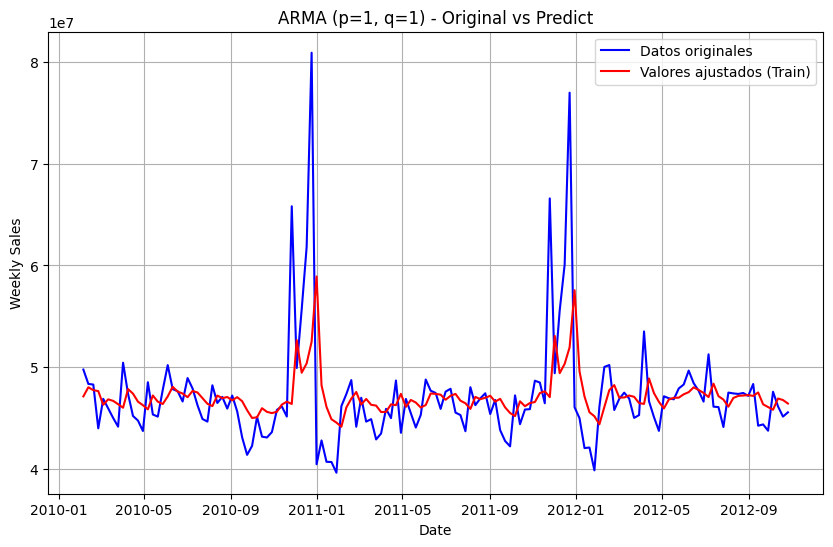

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)  


p = 1  # AR
q = 1  # MA
d = 0  # Diff

arma_model = sm.tsa.ARIMA(df['Weekly_Sales'], order=(p, d, q)).fit()

print(arma_model.summary())

fitted_values = arma_model.fittedvalues

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Datos originales', color='blue')  
plt.plot(df.index, fitted_values, label='Valores ajustados (Train)', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARMA (p={}, q={}) - Original vs Predict'.format(p, q))
plt.legend()
plt.grid(True)
plt.show()


### ***Media Móvil Autorregresiva Integrada (ARIMA)***


In [52]:
mod = sm.tsa.statespace.SARIMAX(df['Weekly_Sales'], trend='n', order=(1, 0, 1),
seasonal_order=(1, 1, 1, 52))
sarimax= mod.fit()
sarimax.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05041D+01    |proj g|=  2.56599D+00


 This problem is unconstrained.



At iterate    5    f=  1.02043D+01    |proj g|=  6.02467D+00

At iterate   10    f=  1.01344D+01    |proj g|=  2.84591D-03

At iterate   15    f=  1.01300D+01    |proj g|=  4.77312D-01

At iterate   20    f=  1.01110D+01    |proj g|=  3.65062D-02

At iterate   25    f=  1.01101D+01    |proj g|=  1.74022D-03

At iterate   30    f=  1.01094D+01    |proj g|=  3.95659D-02

At iterate   35    f=  1.01086D+01    |proj g|=  3.64498D-03

At iterate   40    f=  1.01082D+01    |proj g|=  4.10076D-03

At iterate   45    f=  1.01081D+01    |proj g|=  6.82989D-03

At iterate   50    f=  1.01080D+01    |proj g|=  6.34066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood               -1445.439
Date:                            Sun, 13 Oct 2024   AIC                           2900.878
Time:                                    14:50:08   BIC                           2913.432
Sample:                                02-05-2010   HQIC                          2905.943
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8633      0.308      2.805      0.005       0.260       1.467
ma.L1         -0.8654      0.301     -2.878      0.004      -1.455      -0.276
ar.S.L52      -0.9968      0.162     -6.165      0.000      -1.314      -0.680
ma.S.L52       0.9912      0.252      3.938      0.000       0.498       1.485
sigma2       3.58e+12   2.53e-13   1.41e+25      0.000    3.58e+12    3.58e+12
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):                45.57
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.04
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+40. Standard errors may be unstable.
"""

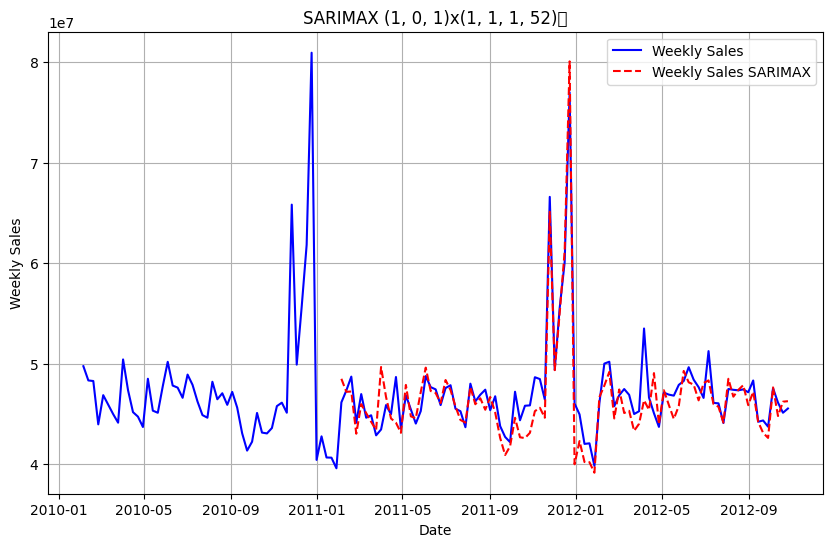

In [53]:
pred_start = df.index[52]  
pred_end = df.index[-1]  

predictions = sarimax.predict(start=pred_start, end=pred_end)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(df.index[52:], predictions, label='Weekly Sales SARIMAX', color='red', linestyle='--')
plt.title('SARIMAX (1, 0, 1)x(1, 1, 1, 52)	')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

pred_start = 52  
pred_end = len(df) - 1 

predictions = sarimax.predict(start=pred_start, end=pred_end)

real_values = df['Weekly_Sales'].iloc[pred_start:pred_end+1]

mse = mean_squared_error(real_values, predictions)

rmse = np.sqrt(mse)

r2 = r2_score(real_values, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MSE: 3664965269308.3394
RMSE: 1914409.9010683002
R²: 0.8314628957103533


In [55]:
residuals = sarimax.resid

print(residuals.head())


Date
2010-02-05    4.975074e+07
2010-02-12    4.843960e+07
2010-02-19    4.846624e+07
2010-02-26    4.423253e+07
2010-03-05    4.719123e+07
dtype: float64


```{admonition} Importante
:class: tip
En este punto con los modelos testeados, nos vemos en la ncesidad de encontrar un nuevo dataset con un comportamiento mas "Real" y no tan predecible para intentar proponer un modelo mas avanzado.
```

### ***Perceptrón Multicapa (MLP)***


### ***Memoria a Corto y Largo Plazo (LSTM)***

### ***SARIMA + MLP***

## ***Benckmark***


### ***Metricas***

## ***Conclusiones***


### ***Mejor Modelo***

## ***Despliegue***


## ***Referencias***

[^1]:Wikipedia, Tiendas Walmart. Disponible: [Aquí](https://en.wikipedia.org/wiki/Walmart) </p>
[^2]:Lihki Rubio, 1. Introducción a las Series de Tiempo. [En Linea]. Disponible: [Aquí](https://lihkir.github.io/TimeSeries/statistical_background.html)</p>
https://support.numxl.com/hc/es/articles/215531183-Apéndice-E-Criterio-de-Información-Hannan-Quinn-HQC